# Assignment - 5

# Question  - 50 startups

# Import necessary data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Import data

In [93]:
startup1 = pd.read_csv(r'D:\Downloads\50_Startups.csv')
startup = startup1.drop(labels= 'State' , axis = 1)
startup

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Data understanding

In [94]:
startup.shape

(50, 4)

In [95]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [96]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [97]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


## Linearity testing

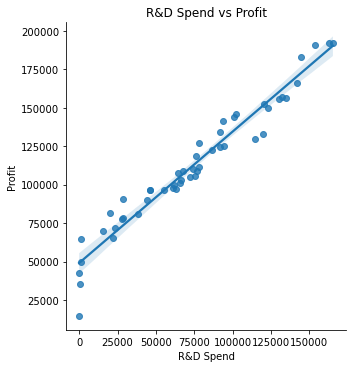

In [98]:
sns.lmplot(x = 'R&D Spend' , y = 'Profit' , data = startup )
plt.title('R&D Spend vs Profit')
plt.show()  

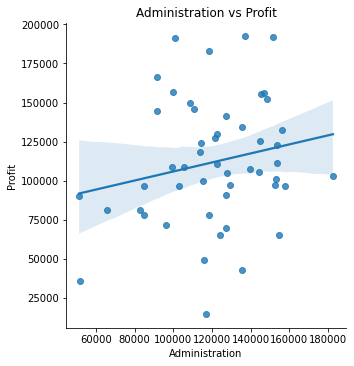

In [99]:
sns.lmplot(x = 'Administration' , y = 'Profit' , data = startup )
plt.title('Administration vs Profit')
plt.show()

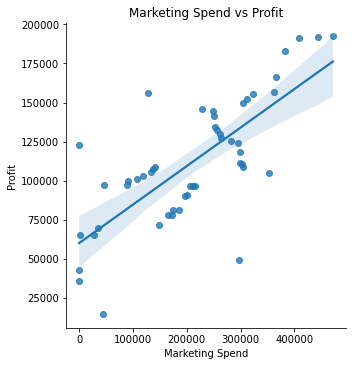

In [100]:
sns.lmplot(x = 'Marketing Spend' , y = 'Profit' , data = startup )
plt.title('Marketing Spend vs Profit')
plt.show()

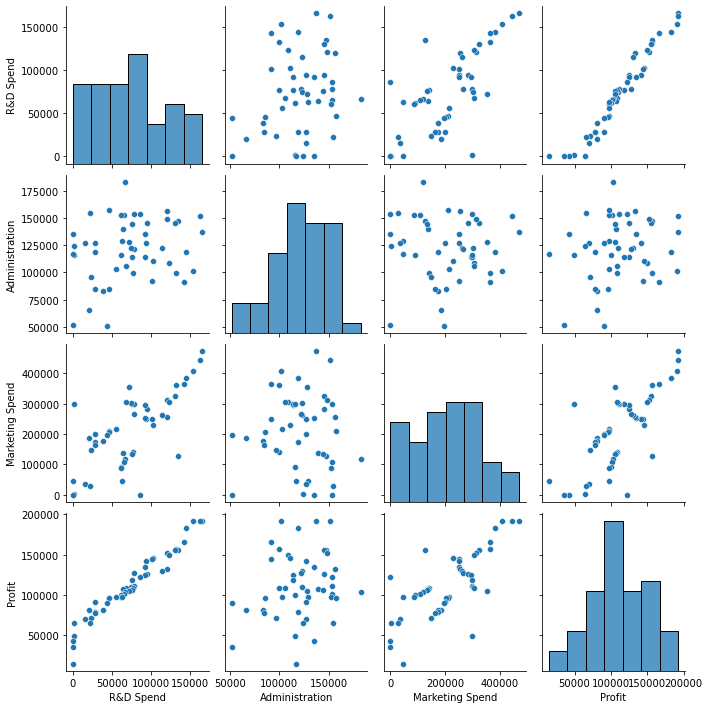

In [101]:
sns.pairplot(data = startup )
plt.show()

## Normality Test

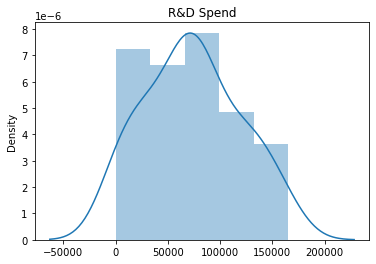

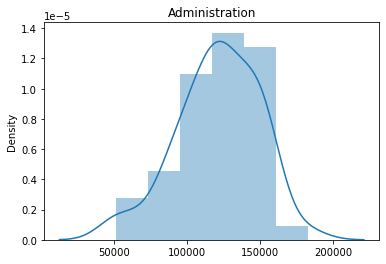

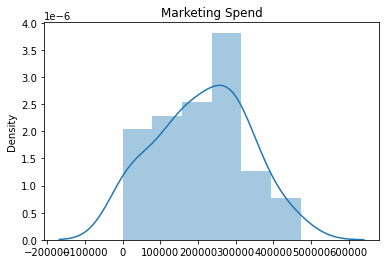

In [102]:
sns.distplot(x = startup['R&D Spend'])
plt.title('R&D Spend')
plt.show()
sns.distplot(x = startup['Administration'])
plt.title('Administration')
plt.show()
sns.distplot(x = startup['Marketing Spend'])
plt.title('Marketing Spend')
plt.show()

normality test fail

## Using probplot

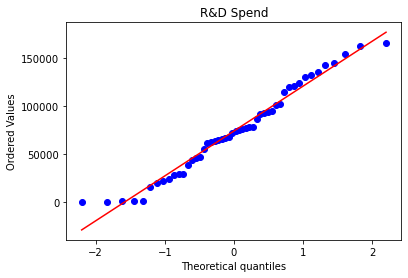

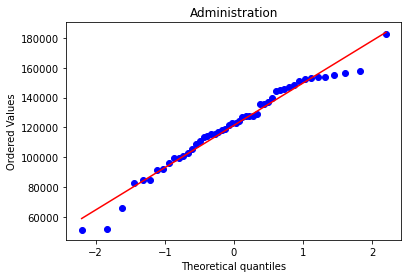

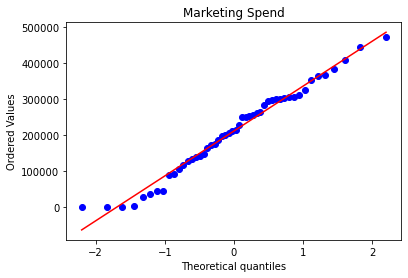

In [103]:
stats.probplot(x = startup['R&D Spend'] , dist = 'norm' , plot = plt)
plt.title('R&D Spend')
plt.show()
stats.probplot(x = startup['Administration'] , dist = 'norm' , plot = plt)
plt.title('Administration')
plt.show()
stats.probplot(x = startup['Marketing Spend'] , dist = 'norm' , plot = plt)
plt.title('Marketing Spend')
plt.show()

# Test for Mutlicollinearity

## Correlation matrix

In [104]:
corr_matrix = startup.corr().round(3)
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000,0.242,0.724,0.973
Administration,0.242,1.000,-0.032,0.201
Marketing Spend,0.724,-0.032,1.000,0.748
Profit,0.973,0.201,0.748,1.000


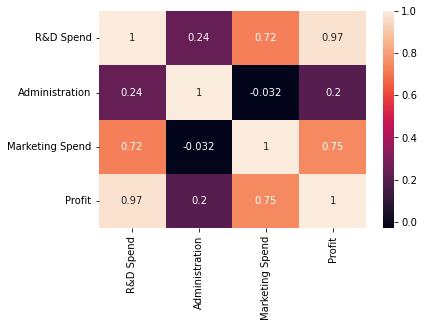

In [105]:
sns.heatmap(data = corr_matrix , annot = True)
plt.show()

## This test is fails

# No auto regression - Passed

# Model Building

In [106]:
x = startup.drop(labels = 'Profit'  , axis = 1)
y = startup[['Profit']]

In [107]:
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [108]:
x['RDSpend']=x['R&D Spend']
x['MarketSpend']=x['Marketing Spend']

In [109]:
x

,R&D Spend,Administration,Marketing Spend,RDSpend,MarketSpend
0,165349.20,136897.80,471784.10,165349.20,471784.10
1,162597.70,151377.59,443898.53,162597.70,443898.53
2,153441.51,101145.55,407934.54,153441.51,407934.54
3,144372.41,118671.85,383199.62,144372.41,383199.62
4,142107.34,91391.77,366168.42,142107.34,366168.42
5,131876.90,99814.71,362861.36,131876.90,362861.36
6,134615.46,147198.87,127716.82,134615.46,127716.82
7,130298.13,145530.06,323876.68,130298.13,323876.68
8,120542.52,148718.95,311613.29,120542.52,311613.29
9,123334.88,108679.17,304981.62,123334.88,304981.62


In [110]:
x=x.drop('R&D Spend',axis=1)

In [111]:
x=x.drop('Marketing Spend',axis =1)

In [112]:
x

,Administration,RDSpend,MarketSpend
0,136897.80,165349.20,471784.10
1,151377.59,162597.70,443898.53
2,101145.55,153441.51,407934.54
3,118671.85,144372.41,383199.62
4,91391.77,142107.34,366168.42
5,99814.71,131876.90,362861.36
6,147198.87,134615.46,127716.82
7,145530.06,130298.13,323876.68
8,148718.95,120542.52,311613.29
9,108679.17,123334.88,304981.62


In [113]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [114]:
x.mean()

Administration    121344.6396
RDSpend            73721.6156
MarketSpend       211025.0978
dtype: float64

In [115]:
x.std()

Administration     28017.802755
RDSpend            45902.256482
MarketSpend       122290.310726
dtype: float64

In [138]:
std_scaler = StandardScaler()
scaler_x = std_scaler.fit_transform(x)
scaler_x

array([[ 5.60752915e-01,  2.01641149e+00,  2.15394309e+00],
       [ 1.08280658e+00,  1.95586034e+00,  1.92360040e+00],
       [-7.28257028e-01,  1.75436374e+00,  1.62652767e+00],
       [-9.63646307e-02,  1.55478369e+00,  1.42221024e+00],
       [-1.07991935e+00,  1.50493720e+00,  1.28152771e+00],
       [-7.76239071e-01,  1.27980001e+00,  1.25421046e+00],
       [ 9.32147208e-01,  1.34006641e+00, -6.88149930e-01],
       [ 8.71980011e-01,  1.24505666e+00,  9.32185978e-01],
       [ 9.86952101e-01,  1.03036886e+00,  8.30886909e-01],
       [-4.56640246e-01,  1.09181921e+00,  7.76107440e-01],
       [-3.87599089e-01,  6.20398248e-01,  1.49807267e-01],
       [-1.06553960e+00,  5.93085418e-01,  3.19833623e-01],
       [ 2.15449064e-01,  4.43259872e-01,  3.20617441e-01],
       [ 5.10178953e-01,  4.02077603e-01,  3.43956788e-01],
       [ 1.26919939e+00,  1.01718075e+00,  3.75742273e-01],
       [ 4.58678535e-02,  8.97913123e-01,  4.19218702e-01],
       [ 9.11841968e-03,  9.44411957e-02

In [139]:
scaler_x = pd.DataFrame(data = scaler_x , columns = ['Administration' , 'RDSpend' , 'MarketSpend'])
scaler_x

,Administration,RDSpend,MarketSpend
0,0.560753,2.016411,2.153943
1,1.082807,1.955860,1.923600
2,-0.728257,1.754364,1.626528
3,-0.096365,1.554784,1.422210
4,-1.079919,1.504937,1.281528
5,-0.776239,1.279800,1.254210
6,0.932147,1.340066,-0.688150
7,0.871980,1.245057,0.932186
8,0.986952,1.030369,0.830887
9,-0.456640,1.091819,0.776107


In [140]:
scaler_x.mean()

Administration   -2.919887e-16
RDSpend           1.199041e-16
MarketSpend      -9.325873e-17
dtype: float64

In [141]:
scaler_x.std()

Administration    1.010153
RDSpend           1.010153
MarketSpend       1.010153
dtype: float64

## Model Training

In [142]:
model_1 = LinearRegression()
model_1.fit(scaler_x,y)

LinearRegression()

## Model testing

In [143]:
y_pred = model_1.predict(scaler_x)
y_pred

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

## Model Evaluation

In [144]:
error = y - y_pred
error

,Profit
0,-259.422890
1,2635.291768
2,8903.110904
3,9205.289974
4,-5951.574183
5,-6589.660571
6,-1991.586669
7,-4268.763048
8,470.070301
9,-5124.724110


# Test for homoscedasticity

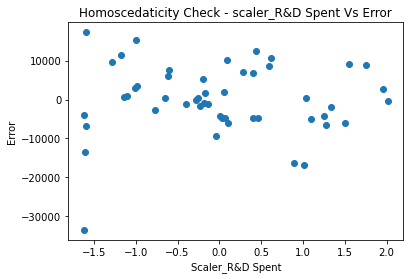

In [147]:
plt.scatter(x = scaler_x['RDSpend'] , y = error)
plt.title('Homoscedaticity Check - scaler_R&D Spent Vs Error')
plt.xlabel('Scaler_R&D Spent')
plt.ylabel('Error')
plt.show()

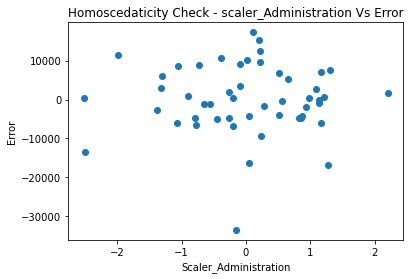

In [148]:
plt.scatter(x = scaler_x['Administration'] , y = error)
plt.title('Homoscedaticity Check - scaler_Administration Vs Error')
plt.xlabel('Scaler_Administration')
plt.ylabel('Error')
plt.show()

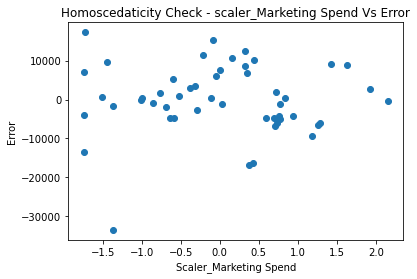

In [150]:
plt.scatter(x = scaler_x['MarketSpend'] , y = error)
plt.title('Homoscedaticity Check - scaler_Marketing Spend Vs Error')
plt.xlabel('Scaler_Marketing Spend')
plt.ylabel('Error')
plt.show()

### homoscedaticity check Failed

# Test of Zero Residual Mean

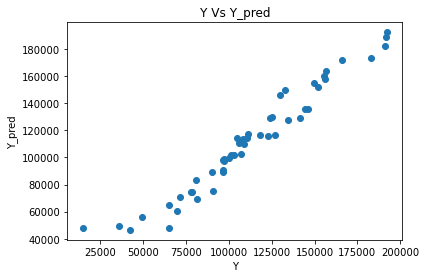

In [151]:
plt.scatter(x = y , y = y_pred)
plt.title('Y Vs Y_pred')
plt.xlabel('Y')
plt.ylabel('Y_pred')
plt.show()

Zero Residual mean passed

# R^2 without transformation 

In [152]:
wot = smf.ols(formula = ' y~RDSpend' , data =x).fit()

In [153]:
wot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           3.50e-32
Time:                        13:31:18   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDSpend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
wot1 = smf.ols(formula = ' y~RDSpend+MarketSpend' , data =x).fit()

In [155]:
wot1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           2.16e-31
Time:                        13:31:19   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDSpend         0.7966      0.041     19.266      0.000       0.713       0.880
MarketSpend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
wot2 = smf.ols(formula = ' y~RDSpend+Administration+MarketSpend' , data =x).fit()

In [157]:
wot2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        13:31:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketSpend        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# R^2 with transformation

In [159]:
rwt = smf.ols(formula = ' y_pred~RDSpend' , data =scaler_x).fit()

In [160]:
rwt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_pred   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.079e+04
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           3.72e-58
Time:                        13:32:35   Log-Likelihood:                -463.90
No. Observations:                  50   AIC:                             931.8
Df Residuals:                      48   BIC:                             935.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05    373.715    299.728      0.000    1.11e+05    1.13e+05
RDSpend     3.882e+04    373.715    103.875      0.000    3.81e+04    3.96e+04
==============================================================================
Omnibus:                        3.047   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.295
Skew:                          -0.517   Prob(JB):                        0.317
Kurtosis:                       3.184   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
rwt1 = smf.ols(formula = ' y_pred~RDSpend+MarketSpend' , data =scaler_x).fit()

In [162]:
rwt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_pred   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.554e+04
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           3.80e-83
Time:                        13:34:02   Log-Likelihood:                -397.50
No. Observations:                  50   AIC:                             801.0
Df Residuals:                      47   BIC:                             806.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.12e+05    100.082   1119.209      0.000    1.12e+05    1.12e+05
RDSpend       3.62e+04    145.143    249.392      0.000    3.59e+04    3.65e+04
MarketSpend  3620.6842    145.143     24.946      0.000    3328.694    3912.675
==============================================================================
Omnibus:                        1.684   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.351
Skew:                           0.401   Prob(JB):                        0.509
Kurtosis:                       2.936   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
rwt2 = smf.ols(formula = ' y_pred~RDSpend+MarketSpend+Administration' , data =scaler_x).fit()

In [166]:
rwt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_pred   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.030e+31
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:35:44   Log-Likelihood:                 1151.7
No. Observations:                  50   AIC:                            -2295.
Df Residuals:                      46   BIC:                            -2288.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.12e+05   3.54e-12   3.17e+16      0.000    1.12e+05    1.12e+05
RDSpend         3.661e+04   5.56e-12   6.58e+15      0.000    3.66e+04    3.66e+04
MarketSpend     3296.2630    5.4e-12   6.11e+14      0.000    3296.263    3296.263
Administration  -743.7733   3.84e-12  -1.94e+14      0.000    -743.773    -743.773
==============================================================================
Omnibus:                        6.760   Durbin-Watson:                   0.506
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                5.673
Skew:                          -0.747   Prob(JB):                       0.0586
Kurtosis:                       3.699   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""